<a href="https://colab.research.google.com/github/saadrza/XAI/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explainability Ensemble for Images
Research Question:
Which is the best way to take advantage of different explainability techniques?

Main Idea:
Select an image classification task and apply different explainable AI (XAI) techniques. Then, find a way to combine the results to generate a more robust explanation compared to using each technique individually.

Possible Steps:

Choose the dataset and deep learning models to be applied (e.g., ImageNet with pre-trained ResNet, MNIST with a custom CNN).
Select three explainability techniques suitable for image tasks. We suggest using SHAP, LIME, and Grad-CAM, as they are well-documented with available tutorials.
Apply each technique individually and analyze the pros and cons of each (e.g., Technique 1 highlights both relevant and irrelevant features, Technique 2 doesn't work well for certain classes, etc.).
Combine the techniques to obtain more robust explanations. This step is the explorative and creative part. Possible approaches include averaging feature maps across techniques, using one technique for identifying main regions and another for finer details, and so on.

In [ ]:
# prompt: Explainability Ensemble for Images
# Research Question:
# Which is the best way to take advantage of different explainability techniques?
# Main Idea:
# Select an image classification task and apply different explainable AI (XAI) techniques. Then, find a way to combine the results to generate a more robust explanation compared to using each technique individually.
# Possible Steps:
# Choose the dataset and deep learning models to be applied (e.g., ImageNet with pre-trained ResNet, MNIST with a custom CNN).
# Select three explainability techniques suitable for image tasks. We suggest using SHAP, LIME, and Grad-CAM, as they are well-documented with available tutorials.
# Apply each technique individually and analyze the pros and cons of each (e.g., Technique 1 highlights both relevant and irrelevant features, Technique 2 doesn't work well for certain classes, etc.).
# Combine the techniques to obtain more robust explanations. This step is the explorative and creative part. Possible approaches include averaging feature maps across techniques, using one technique for identifying main regions and another for finer details, and so on.

!pip install lime shap

import numpy as np
import matplotlib.pyplot as plt
# ... other imports for your chosen model and dataset ...

# 1. Choose dataset and model
# Example using MNIST and a simple CNN (replace with your chosen model and dataset)
# ... load MNIST data and define the CNN model ...

# 2. Select explainability techniques
# SHAP, LIME, Grad-CAM

# 3. Apply each technique individually
# ... Example using SHAP (adapt for LIME and Grad-CAM)
# ...  Assume 'explainer' and 'image' are appropriately defined ...

# Example (replace with your actual implementations):

def explain_with_shap(model, image):
  # Placeholder - Replace with your actual SHAP implementation
  # ...
  shap_values = np.random.rand(28,28)  # Replace with actual SHAP values
  return shap_values

def explain_with_lime(model, image):
  # Placeholder - Replace with your actual LIME implementation
  lime_values = np.random.rand(28, 28) #Replace with actual LIME values
  return lime_values

def explain_with_gradcam(model, image):
    # Placeholder - Replace with your actual Grad-CAM implementation
    gradcam_values = np.random.rand(28, 28) # Replace with actual GradCAM values
    return gradcam_values

# Example usage (replace with your data loading):
image = np.random.rand(28, 28) # Replace with your image data
model = None # Replace with your trained model

shap_explanation = explain_with_shap(model, image)
lime_explanation = explain_with_lime(model, image)
gradcam_explanation = explain_with_gradcam(model, image)


# 4. Combine techniques
# Example: Averaging the explanations
ensemble_explanation = (shap_explanation + lime_explanation + gradcam_explanation) / 3

# Example: Visualization (replace with your visualization)
plt.imshow(ensemble_explanation, cmap='viridis')
plt.title("Ensemble Explanation")
plt.show()


# Further analysis and experimentation with different combination methods.

# Example using a weighted average, where weights are determined by performance metrics (e.g. accuracy) of individual XAI methods
# Weights are between 0 and 1, adding to 1
weight_shap = 0.4
weight_lime = 0.3
weight_gradcam = 0.3
weighted_ensemble = (weight_shap * shap_explanation) + (weight_lime * lime_explanation) + (weight_gradcam * gradcam_explanation)
plt.imshow(weighted_ensemble, cmap="magma")
plt.title("Weighted Ensemble Explanation")
plt.colorbar() # Show the colorbar
plt.show()



---



# *Project Start*


*   Install and Import important Packages
*   Import the model
*   Transform the images
*   Generate Predicitons




# Install and Import Important Packages

In [3]:
!pip install lime
import os
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl


from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
%matplotlib inline
print('Notebook run using keras:', keras.__version__)
#display
from IPython.display import Image, display


Notebook run using keras: 3.8.0


# Install the base model

In [7]:
inet_model = inc_net.InceptionV3()
target_size = (299,299)

# Preprocess the images

## Transform the images

In [154]:
def transform_img_fn(path_list, target_size):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Let's see the top 5 prediction for some image

> Add blockquote



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
('n02133161', 'American_black_bear', np.float32(0.6372792))
('n02105056', 'groenendael', np.float32(0.031802803))
('n02104365', 'schipperke', np.float32(0.02992132))
('n01883070', 'wombat', np.float32(0.028507452))
('n01877812', 'wallaby', np.float32(0.025098657))


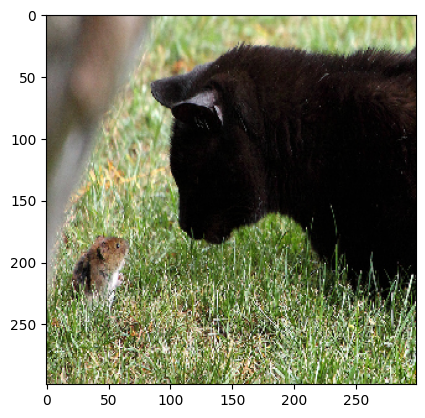

In [19]:
images = transform_img_fn([os.path.join('cat_mouse.jpg')], target_size)
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

# LIME Implementation


In [27]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
def implement_lime(model, image):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image[0].astype('double'),
                                             inet_model.predict,
                                             top_labels=5,
                                             hide_color=0,
                                             num_samples=1000
                                             )
    explanation_lime = explanation
    return explanation_lime

In [128]:
def explain_with_lime(explanation_lime, image, num_features, top_candidate):
    temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[top_candidate], positive_only=True, num_features= num_features, hide_rest=False, min_weight=0.1)
    plt.figure()
    plt.title("Number of Features= " + str(num_features))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

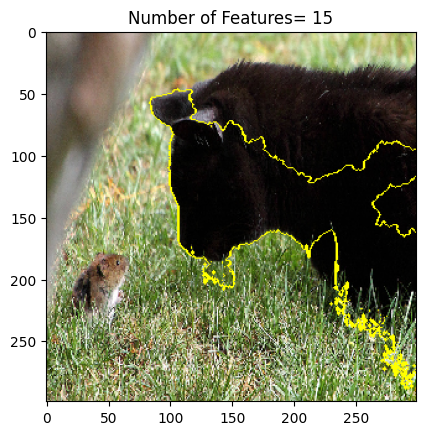

In [131]:
explanation_lime = implement_lime(inet_model, images)
explain_with_lime(explanation_lime, images, num_features=15, top_candidate=0)

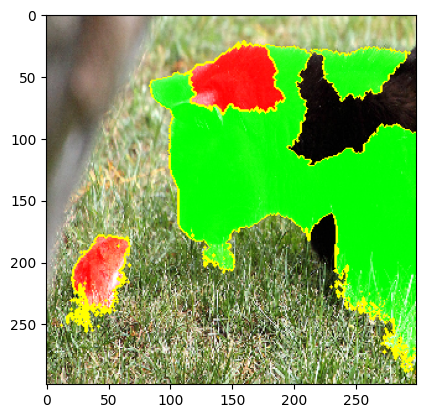

In [134]:
temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

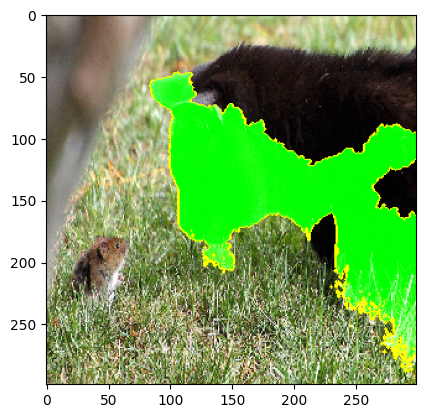

In [140]:
temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [141]:
def heatmap_lime(explanation_lime, image, num_features, top_candidate):
    ind =  explanation_lime.top_labels[0]
    dict_heatmap_lime = dict(explanation_lime.local_exp[ind])
    heatmap_lime = np.vectorize(dict_heatmap_lime.get)(explanation_lime.segments)
    plt.imshow(heatmap_lime, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()


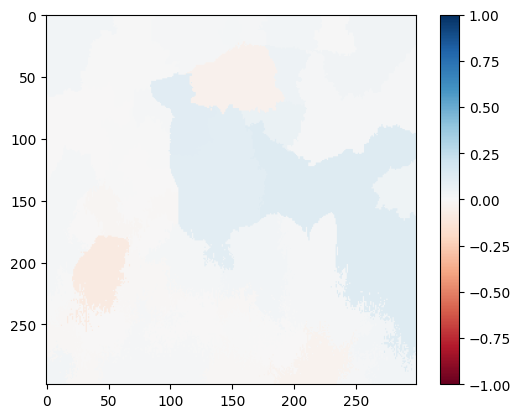

In [143]:
heatmap_lime(explanation_lime, images, num_features=15, top_candidate=0)

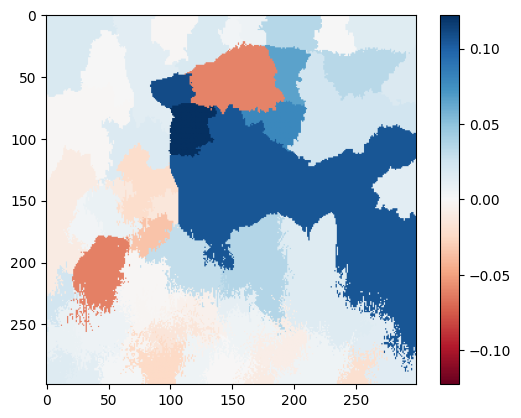

In [144]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

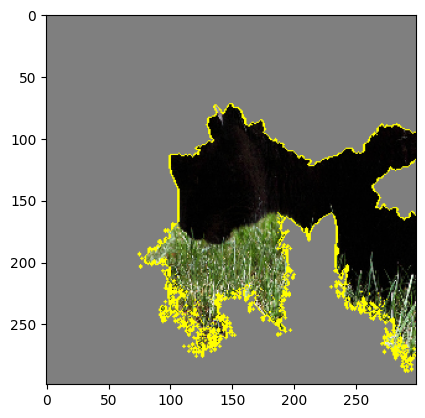

In [147]:
temp, mask = explanation.get_image_and_mask(106, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

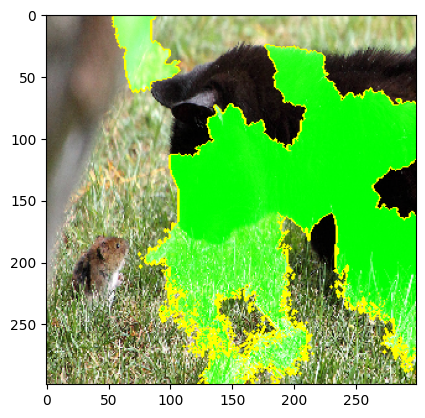

In [148]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))




---



# Grad_cam++ implementation

NameError: name 'out' is not defined

In [120]:
def transform_img_fn(path_list, target_size):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


The last conv2d layer is: conv2d_375


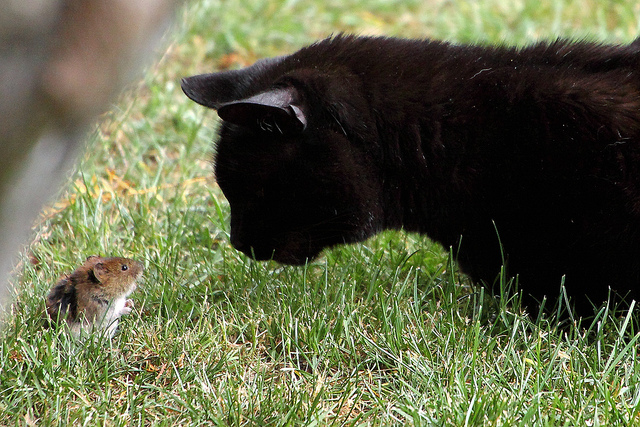

In [113]:
model_builder = inc_net.InceptionV3()
img_size = (299, 299)
preprocess_input = inc_net.preprocess_input
decode_predictions = decode_predictions

# Assuming 'model' is your Keras model
layer_names = [layer.name for layer in model_builder.layers]
conv2d_layers = [name for name in layer_names if "conv2d" in name]
last_conv2d_layer_name = conv2d_layers[-1]

print(f"The last conv2d layer is: {last_conv2d_layer_name}")

last_conv_layer_name = last_conv2d_layer_name


# The local path to our target image
img_path = "cat_mouse.jpg"  # Assuming the image is in the current directory.

display(Image(img_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Predicted: [('n02133161', 'American_black_bear', np.float32(8.339012)), ('n02105056', 'groenendael', np.float32(5.3413587)), ('n02104365', 'schipperke', np.float32(5.2803755)), ('n01883070', 'wombat', np.float32(5.23197)), ('n01877812', 'wallaby', np.float32(5.1046185))]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_939']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


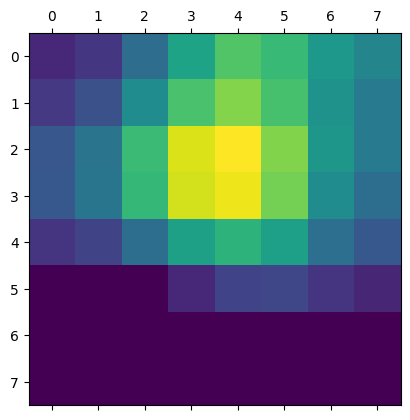

In [157]:
# Prepare image
img_array = images

# Make model
model = model_builder

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=5)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


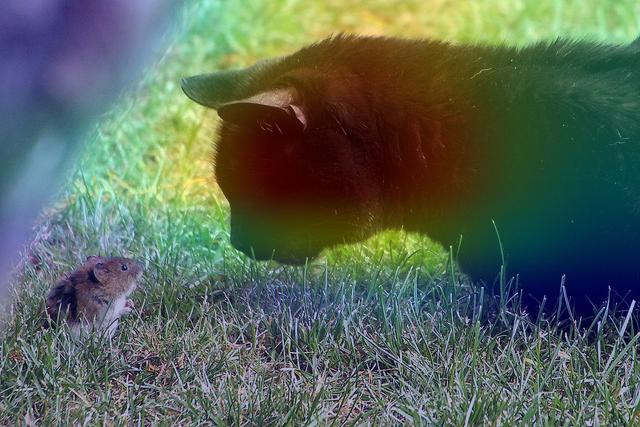

In [159]:

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

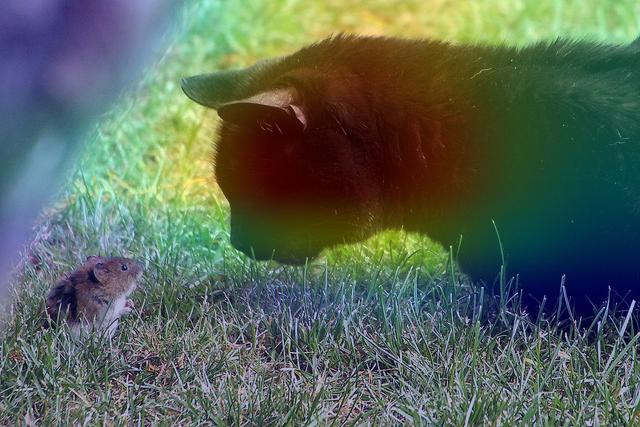

In [160]:
save_and_display_gradcam(img_path, heatmap)

# SHAP implementation

In [ ]:
# prompt: SHAP implemnatio

import shap

# ... (your existing code) ...

# Assuming 'model' is your Keras model and 'images' contains your image data.
# Replace with your actual model and image data.


def explain_with_shap(model, images):
    # Create a SHAP explainer
    explainer = shap.DeepExplainer(model, images)  # Use DeepExplainer for deep learning models

    # Calculate SHAP values
    shap_values = explainer.shap_values(images)

    return shap_values

shap_explanation = explain_with_shap(model_builder, images)

# Assuming shap_explanation is a list of arrays (one for each class).
# Visualize SHAP values for the top predicted class (adjust index as needed).

# Get the index of the top prediction (Example)
pred_index = np.argmax(model_builder.predict(images))

# Plot the SHAP values
shap.image_plot(shap_explanation[pred_index], -images) # Use -images to correctly plot

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_939
Received: inputs=['Tensor(shape=(1, 299, 299, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_939
Received: inputs=['Tensor(shape=(2, 299, 299, 3))']
  warnings.warn(msg)


In [ ]:
import json


import shap

# load pre-trained model and choose two images to explain
model = inc_net.InceptionV3()


def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)


X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)